<a href="https://colab.research.google.com/github/Kianjputnam/project_chd/blob/main/Visuals_chd_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__Visualizations__

###Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Getting data

In [5]:
! git clone https://www.github.com/Kianjputnam/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [6]:
clean_chd_train = pd.read_csv("./project_chd/clean_chd_train.csv")

###Correlation Matrix

In [7]:
clean_chd_train.dtypes

Unnamed: 0             int64
sex                    int64
age                    int64
education              int64
currentSmoker          int64
cigsPerDay             int64
BPMeds                 int64
prevalentStroke        int64
prevalentHyp           int64
diabetes               int64
totChol                int64
sysBP                float64
diaBP                float64
BMI                  float64
heartRate              int64
glucose                int64
TenYearCHD             int64
sex_category          object
edu_category          object
smoker_category       object
BPMeds_category       object
stroke_category       object
hyp_category          object
diabetes_category     object
chd_category          object
dtype: object

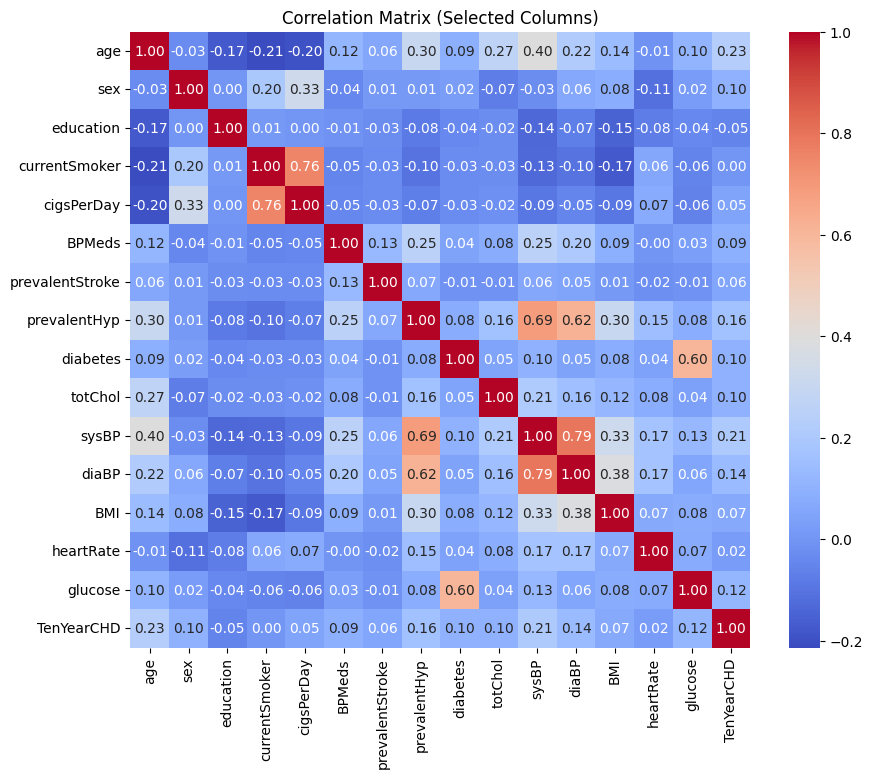

In [8]:

selected_corr_columns = ['age','sex','education','currentSmoker','cigsPerDay','BPMeds',
                         'prevalentStroke','prevalentHyp','diabetes','totChol','sysBP',
                         'diaBP','BMI','heartRate','glucose','TenYearCHD'
                         ]

# Select only the specified columns
train_selected = clean_chd_train[selected_corr_columns]

# Calculate correlation matrix
correlation_matrix_selected = train_selected.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Selected Columns)')
plt.show()


##Notes
* Glucose and insulin highly correlated
* prevalent hypertension, systolic BP, and diastolic BP all highly correlated
* Current smoker and cigarettes per day highly correlated
* Glucose and diabetes also highly correlated
* Age and current smoker/cigarettes per day are the highest negative correlation

Top correlations to TenYearCHD:
* age
* sysBP
* prevalentHyp
* diaBP
* glucose


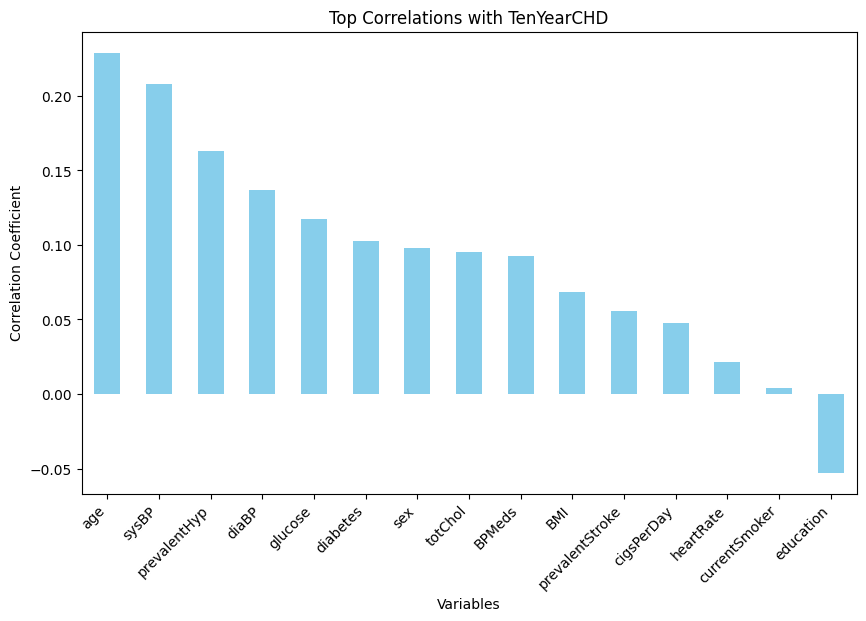

In [14]:
top_correlations = correlation_matrix_selected['TenYearCHD'].sort_values(ascending=False).drop('TenYearCHD')

plt.figure(figsize=(10, 6))
top_correlations.plot(kind='bar', color='skyblue')
plt.title('Top Correlations with TenYearCHD')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()


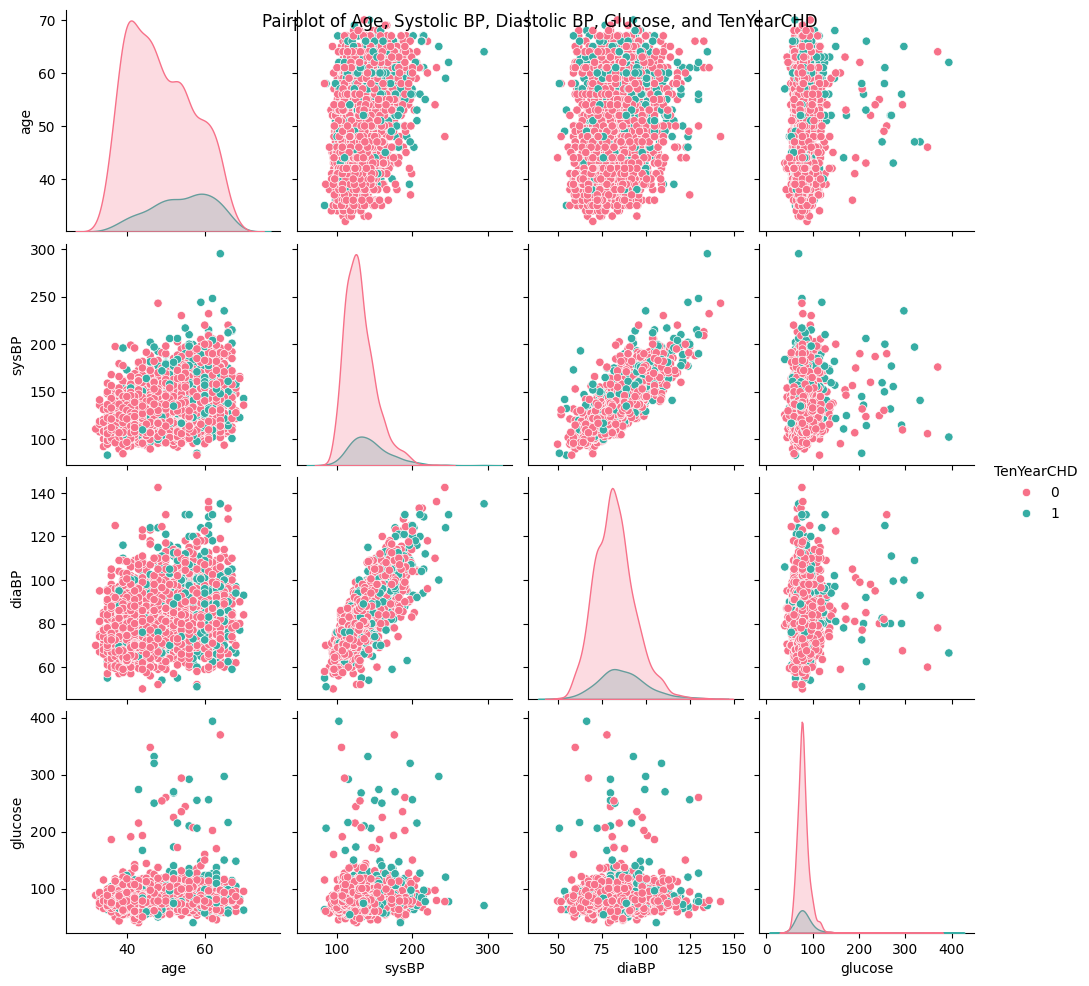

In [15]:

# Select variables of interest
variables_of_interest = ['age', 'sysBP', 'diaBP', 'glucose', 'TenYearCHD']
data_subset = clean_chd_train[variables_of_interest]

# Create pairplot
sns.pairplot(data_subset, hue='TenYearCHD', palette='husl')
plt.suptitle('Pairplot of Age, Systolic BP, Diastolic BP, Glucose, and TenYearCHD')
plt.show()
